# Loan prediction analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('loan.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(381, 13)

In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [5]:
data.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

Dropping loan id 

In [6]:
data.drop(['Loan_ID'],axis=1,inplace=True)

In [7]:
data['Gender'].value_counts()

Male      291
Female     85
Name: Gender, dtype: int64

In [8]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

In [9]:
data['Dependents'].replace(['3+'],'3',inplace=True)
data['Dependents'].value_counts()



0    234
2     59
1     52
3     28
Name: Dependents, dtype: int64

In [10]:
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)

In [11]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
data['Self_Employed'].value_counts()

No     325
Yes     35
Name: Self_Employed, dtype: int64

In [13]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

In [14]:
data.isnull().sum()


Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

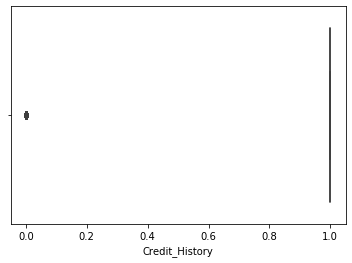

In [15]:
sb.boxplot(data['Credit_History'].dropna())

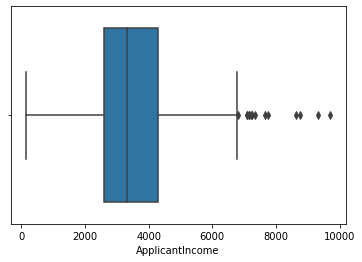

In [16]:
   sb.boxplot(data['ApplicantIncome'])

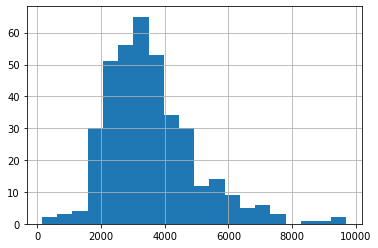

In [17]:
data['ApplicantIncome'].hist(bins=20)

In [18]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(),inplace=True)

In [19]:
data['Credit_History'].fillna(data['Credit_History'].mean(),inplace=True)

In [20]:
data.isnull().any()

Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [21]:
x=data.iloc[:,0:11].values
y=data.iloc[:,-1].values

In [22]:
y

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le=LabelEncoder()


In [26]:
y=le.fit_transform(y)

In [27]:
y

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,

In [28]:
x

array([['Male', 'Yes', '1', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ...,
       ['Female', 'No', '0', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', '3', ..., 180.0, 1.0, 'Rural'],
       ['Female', 'No', '0', ..., 360.0, 0.0, 'Semiurban']], dtype=object)

In [29]:
ct=ColumnTransformer([("oh",OneHotEncoder(drop='first'),[0,1,2,3,4,10])],remainder="passthrough")
x=ct.fit_transform(x)
x

array([[1.0, 1.0, 1.0, ..., 128.0, 360.0, 1.0],
       [1.0, 1.0, 0.0, ..., 66.0, 360.0, 1.0],
       [1.0, 1.0, 0.0, ..., 120.0, 360.0, 1.0],
       ...,
       [0.0, 0.0, 0.0, ..., 71.0, 360.0, 1.0],
       [1.0, 1.0, 0.0, ..., 40.0, 180.0, 1.0],
       [0.0, 0.0, 0.0, ..., 133.0, 360.0, 0.0]], dtype=object)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
from sklearn.pipeline import Pipeline

# Naive Bayes

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB

In [34]:
pipe=Pipeline([("mn",MinMaxScaler()),("naive",GaussianNB())])

In [35]:
pipe.fit(train_x,train_y)

Pipeline(memory=None,
         steps=[('mn', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('naive', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

In [36]:
y_pred=pipe.predict(test_x)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1])

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,y_pred)

0.8051948051948052

# Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
from sklearn.model_selection import GridSearchCV


In [41]:
dt_grid=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid={'criterion':['gini','entropy'],'max_depth':np.arange(2,8)},cv=5)

In [42]:
dt_grid.fit(train_x,train_y)

C:\Users\harin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7])},
           

In [43]:
dt_grid.best_params_

{'criterion': 'entropy', 'max_depth': 2}

In [44]:
dt=DecisionTreeClassifier(max_depth=2)

In [45]:
dt.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [46]:
y_pre=dt.predict(test_x)
y_pre

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,y_pre)

0.8181818181818182

# Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf_grid=GridSearchCV(estimator=RandomForestClassifier(),param_grid={'n_estimators':np.arange(1,50),'criterion':["gini","entropy"],'max_depth':np.arange(2,10)},cv=5)

In [50]:
rf_grid.fit(train_x,train_y)


C:\Users\harin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy

In [51]:
rf_grid.best_params_

{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 20}

In [56]:
rf=RandomForestClassifier(n_estimators=20,max_depth=9,criterion='gini')

In [57]:
rf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
yp=rf.predict(test_x)
yp

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1])

In [59]:
accuracy_score(test_y,yp)

0.8311688311688312

# K NERAREST NEIGHBORS

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn_grid=GridSearchCV(estimator=KNeighborsClassifier(),param_grid={'n_neighbors':np.arange(1,20)},cv=5)

In [62]:
knn_grid.fit(train_x,train_y)

C:\Users\harin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [63]:
knn_grid.best_params_

{'n_neighbors': 19}

In [64]:
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [65]:
knn_pred=knn.predict(test_x)
knn_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,knn_pred)

0.7012987012987013

# Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression


In [69]:
lr=LogisticRegression()

In [70]:
lr.fit(train_x,train_y)

C:\Users\harin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
lr_pred=lr.predict(test_x)

In [72]:
lr_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [73]:
accuracy_score(test_y,lr_pred)

0.8051948051948052

# Random Forest Classifier has the best accuracy of 83 compared to other classification algorithms